### Libraries used



In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import LabelEncoder


In [50]:
# Set seed
SEED = 777

### Loading data

In [43]:
# Load dataset
df = pd.read_csv("AppReview-Multilabel.csv")
df.head()

,review,bug_report,improvement_request,rating,others
0,يبيله تصليحات كثير,High,Medium,Low,No
1,ماتحملت ابدددددا ونا دفعت فلوس 🤔😕,No,Medium,Medium,Low
2,اتمنى منكم عمل خيار لتفضيل المسلسل بالكامل عوض...,No,High,Low,No
3,ممتاز وبسيط وتشغيله لا يؤثر على سرعة الانترنت,No,No,High,No
4,تبين م لي ي تم ل يب,No,No,Low,High


In [44]:
print(df.describe())

              review bug_report improvement_request rating others
count           2900       2900                2900   2900   2900
unique          2892          4                   4      4      4
top     اكثر من رائع         No                  No   High     No
freq               3       1736                1797    988   2080


## Part-B: Multiclass App Review Classification: from scratch



#### B.1 Lable distribution

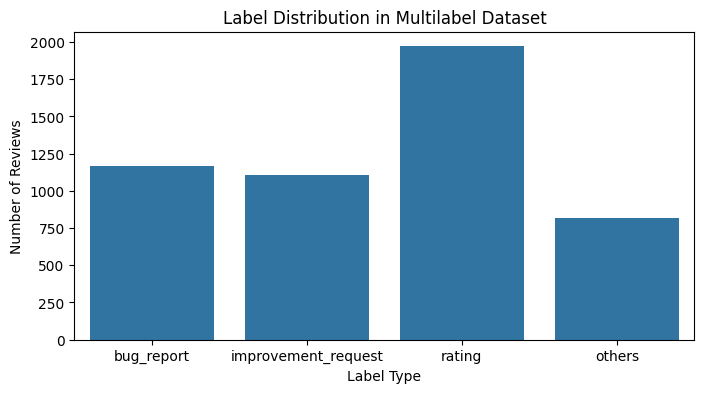

In [45]:
# Count non-"No" values to estimate multilabel counts
class_cols = ['bug_report', 'improvement_request', 'rating', 'others']
label_counts = {}

for col in class_cols:
    label_counts[col] = (df[col] != "No").sum()

# Plot label distribution
plt.figure(figsize=(8, 4))
sns.barplot(x=list(label_counts.keys()), y=list(label_counts.values()))
plt.title("Label Distribution in Multilabel Dataset")
plt.ylabel("Number of Reviews")
plt.xlabel("Label Type")
plt.show()


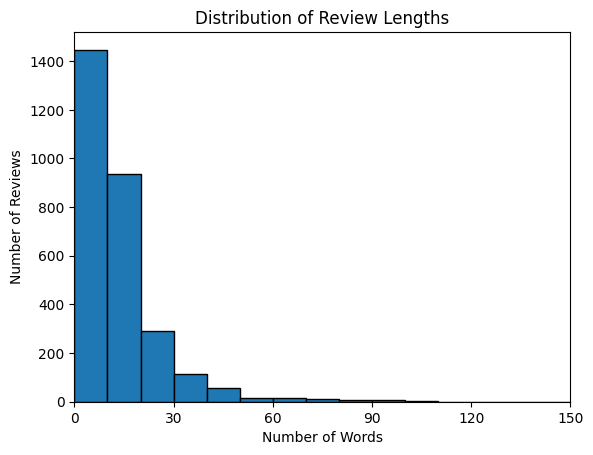


Average Review Length: 13.551724137931034


In [46]:
df['review_length'] = df['review'].apply(lambda x: len(str(x).split()))


plt.hist(df['review_length'], bins=range(0, 151, 10), edgecolor="black")  # Adjust bins for better granularity
plt.title("Distribution of Review Lengths")
plt.xlim(0, 150)  # Set x-axis range
plt.xticks(range(0, 151, 30))  # Adjust tick marks
plt.xlabel("Number of Words")
plt.ylabel("Number of Reviews")
plt.show()

print("\nAverage Review Length:", df['review_length'].mean())



#### B.2 Conversion to multiclass

In [47]:
def assign_single_label(row):
    if row['bug_report'] != 'No':
        return 'bug_report'
    elif row['improvement_request'] != 'No':
        return 'improvement_request'
    elif row['rating'] != 'No':
        return 'rating'
    else:
        return 'others'

df['label'] = df.apply(assign_single_label, axis=1)
df['label'].value_counts()


,count
label,
bug_report,1164
rating,944
improvement_request,595
others,197


#### B.3 Text preprocessing

In [48]:
def preprocess_arabic(text):
    text = str(text)
    # Normalize Arabic characters
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "و", text)
    text = re.sub("ئ", "ي", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)

    # Remove diacritics
    text = re.sub(r'[\u064B-\u0652]', '', text)

    # Remove repeated characters
    text = re.sub(r'(.)\1+', r'\1\1', text) # kept 2 since some arabic words actually have two repeating letters

    # Remove non-Arabic letters and digits
    text = re.sub(r'[^\u0600-\u06FF\s]', '', text)

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Apply preprocessing
df['cleaned_review'] = df['review'].apply(preprocess_arabic)
df[['review', 'cleaned_review']].head()

,review,cleaned_review
0,يبيله تصليحات كثير,يبيله تصليحات كثير
1,ماتحملت ابدددددا ونا دفعت فلوس 🤔😕,ماتحملت ابددا ونا دفعت فلوس
2,اتمنى منكم عمل خيار لتفضيل المسلسل بالكامل عوض...,اتمني منكم عمل خيار لتفضيل المسلسل بالكامل عوض...
3,ممتاز وبسيط وتشغيله لا يؤثر على سرعة الانترنت,ممتاز وبسيط وتشغيله لا يوثر علي سرعه الانترنت
4,تبين م لي ي تم ل يب,تبين م لي ي تم ل يب


#### B.4 Label encoding

In [49]:
label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['label'])

# For reference
label_map = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_map)

Label Mapping: {'bug_report': np.int64(0), 'improvement_request': np.int64(1), 'others': np.int64(2), 'rating': np.int64(3)}


#### B.5 Data splitting

In [51]:
# First: Train-Test Split (80-20)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=SEED, stratify=df['label_encoded'])

# Second: Validation Split from Train (15% of train)
train_df, val_df = train_test_split(train_df, test_size=0.15, random_state=SEED, stratify=train_df['label_encoded'])

# Show sizes
print(f"Training Samples: {len(train_df)}")
print(f"Validation Samples: {len(val_df)}")
print(f"Testing Samples: {len(test_df)}")

Training Samples: 1972
Validation Samples: 348
Testing Samples: 580


## Part-C: Multilabel App Review Classification: from scratch

## Part-D: Multiclass App Review Classification: Finetune an MLM

## Part-E: Multilabel App Review Classification: Finetune an MLM

## Part-F: Multiclass App Review Classification: In-Context learning using causal LLM


#### Zero-shot learning

#### Few-shot learning

## Part-G: Multilabel App Review Classification: In-Context learning using causal LLM


#### Zero-shot learning

#### Few-shot learning